# Check Gaussian Fit of Filter transmission


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- update : May 2021
- update : October 23th 2021
- **CC : kernel anaconda3pbspzrail**

**Purpose is to view the Gaussian Mixture decomposition of filter transmission**

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [18]:
from pkg_resources import resource_filename

In [19]:
import configparser

In [20]:
! ls ../tmp

delight_data	       parametersTest_16.cfg  parametersTest_3.cfg
delight_indata	       parametersTest_17.cfg  parametersTest_4.cfg
parametersTest_10.cfg  parametersTest_18.cfg  parametersTest_5.cfg
parametersTest_11.cfg  parametersTest_19.cfg  parametersTest_6.cfg
parametersTest_12.cfg  parametersTest_1.cfg   parametersTest_7.cfg
parametersTest_13.cfg  parametersTest_20.cfg  parametersTest_8.cfg
parametersTest_14.cfg  parametersTest_21.cfg  parametersTest_9.cfg
parametersTest_15.cfg  parametersTest_2.cfg   parametersTest.cfg


In [21]:
!ls ../tmp/delight_indata

BROWN_SEDs  CWW_SEDs  FILTERS


## Defines file location

In [22]:
#basedelight_datapath = resource_filename('delight', '../data')
basedelight_datapath = "../tmp/delight_indata"

In [23]:
filename_config="../tmp/parametersTest.cfg"

In [24]:
#dir_filter="./data/FILTERS"
dir_filter = os.path.join(basedelight_datapath,"FILTERS")

In [25]:
filename_filters = ["lsst_u.res","lsst_g.res","lsst_r.res","lsst_i.res","lsst_z.res","lsst_y.res"]
filename_fitfilters = ["lsst_u_gaussian_coefficients.txt", "lsst_g_gaussian_coefficients.txt",
             "lsst_r_gaussian_coefficients.txt","lsst_i_gaussian_coefficients.txt",
            "lsst_z_gaussian_coefficients.txt", "lsst_y_gaussian_coefficients.txt"]

## Decode parameter file

In [26]:
config = configparser.ConfigParser()
if not os.path.isfile(filename_config):
    raise Exception(filename_config +' : file not found')
config.read(filename_config)
config.sections()

['Bands', 'Templates', 'Simulation', 'Training', 'Target', 'Other']

In [27]:
numCoefs  = int(config["Bands"]["numCoefs"])
bandNames = config["Bands"]['names']
bandColors = ["b","g","r","orange","grey","k"]

In [28]:
band_names=bandNames.split(" ")

In [29]:
Nbands=len(band_names)

## Plot filters and fitted filter transmission

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


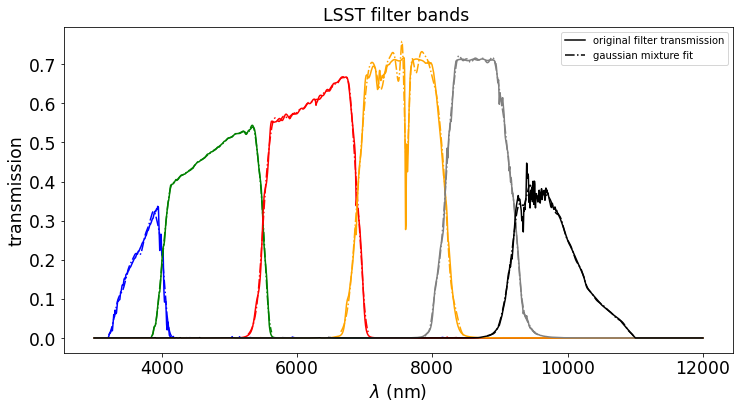

In [30]:
plt.figure(figsize=(12,6))
for idx_filter in np.arange(Nbands):
    
    # read coefficients of fits
    full_filename_fitfilter=os.path.join(dir_filter,filename_fitfilters[idx_filter])
    coefs=np.loadtxt(full_filename_fitfilter)
    
    # read filters
    full_filename_filter=os.path.join(dir_filter,filename_filters[idx_filter])
    data = np.genfromtxt(full_filename_filter)
    
    x, y = data[:, 0], data[:, 1]
    #y /= x  # divide by lambda
    # Only consider range where >1% max
    ind = np.where(y > 0.01*np.max(y))[0]
    lambdaMin, lambdaMax = x[ind[0]], x[ind[-1]]
    
    xf = np.linspace(lambdaMin, lambdaMax, num=1000)
    yy = 0*xf
    for i in range(numCoefs):
        yy += coefs[i, 0] * np.exp(-0.5*((coefs[i, 1] - xf)/coefs[i, 2])**2.0)
    if idx_filter==5:    
        plt.plot(x,y,"-",color=bandColors[idx_filter],label="original filter transmission")
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter],label='gaussian mixture fit')
    else:
        plt.plot(x,y,"-",color=bandColors[idx_filter])
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter])
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("transmission")
    plt.title("LSST filter bands ")
    plt.legend(loc="upper right")